<a href="https://colab.research.google.com/github/Pablo123456678/Tarea-FEST/blob/main/CodigoPunto3FEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

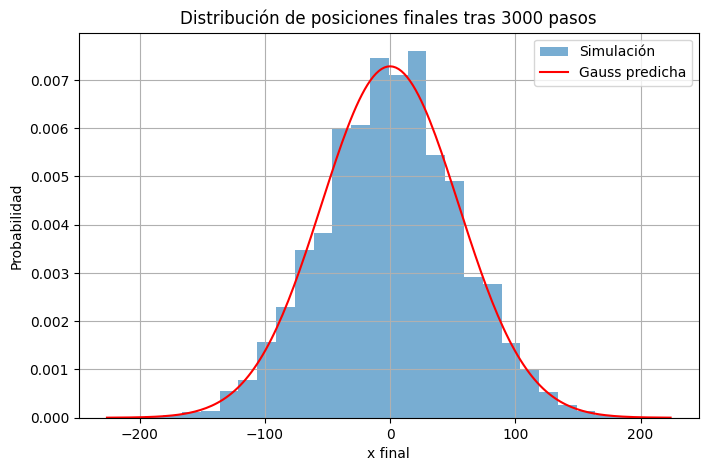

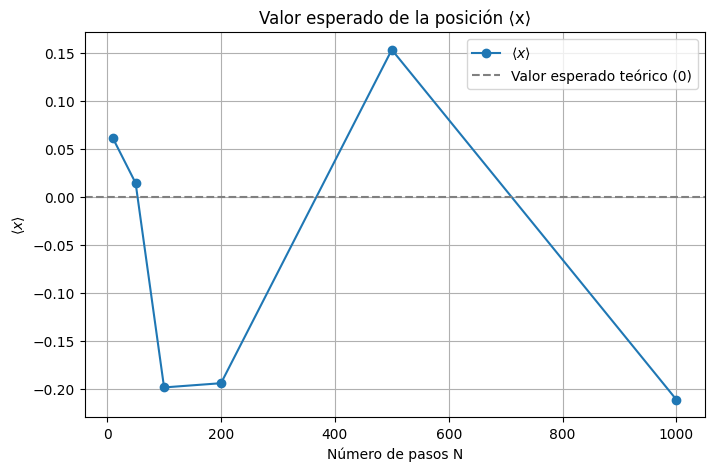

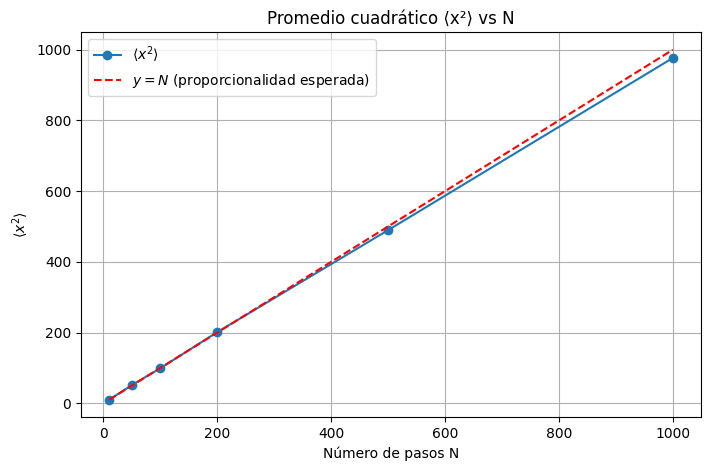

Estimaciones de la constante de difusión D:
N=  10 | ⟨x⟩ ≈ 0.062 | ⟨x²⟩ ≈ 9.848 | D ≈ 0.492
N=  50 | ⟨x⟩ ≈ 0.015 | ⟨x²⟩ ≈ 51.284 | D ≈ 0.513
N= 100 | ⟨x⟩ ≈ -0.198 | ⟨x²⟩ ≈ 99.042 | D ≈ 0.495
N= 200 | ⟨x⟩ ≈ -0.194 | ⟨x²⟩ ≈ 201.192 | D ≈ 0.503
N= 500 | ⟨x⟩ ≈ 0.154 | ⟨x²⟩ ≈ 489.715 | D ≈ 0.490
N=1000 | ⟨x⟩ ≈ -0.211 | ⟨x²⟩ ≈ 976.689 | D ≈ 0.488


In [9]:
# Simulación numérica de la marcha aleatoria en 1D
#Nombre: Juan Pablo Puentes Bayona
#Código: 202310155
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def marcha_aleatoria(N, n_veces=1000):
    """
    Simula una marcha aleatoria en 1D.
    Parámetros
    ----------
    N : int
        Número de pasos en cada caminata.
    n_veces : int
        Número de veces que se repite la simulación.

    Retorna
    -------
    posiciones_finales : np.array
        Arreglo con las posiciones finales de cada caminata.
    trayectorias : np.array
        Matriz con las trayectorias de todas las caminatas.
    """
    pasos = np.random.choice([-1, 1], size=(n_veces, N))
    trayectorias = np.cumsum(pasos, axis=1)
    posiciones_finales = trayectorias[:, -1]
    return posiciones_finales, trayectorias
def promedio(N_values, n_veces=5000):
    """
    Calcula <x> y <x^2> para distintos valores de N.
    Parámetros
    ----------
    N_values : list
        Lista de valores de N (número de pasos).
    n_veces : int
        Número de repeticiones de cada simulación.

    Retorna
    -------
    resultados : dict
        Diccionario con <x> y <x^2> para cada N.
    """
    resultados = {"N": [], "x_mean": [], "x2_mean": []}
    for N in N_values:
        pos_finales, _ = marcha_aleatoria(N, n_veces)
        resultados["N"].append(N)
        resultados["x_mean"].append(np.mean(pos_finales))      # ⟨x⟩
        resultados["x2_mean"].append(np.mean(pos_finales**2))  # ⟨x²⟩
    return resultados
# ----- Simulación para varios valores de N ------
N_values = [10, 50, 100, 200, 500, 1000]
res = promedio(N_values, n_veces=5000)
N = 3000  # número de pasos
n_veces = 5000  # cantidad de caminatas
pos_finales, trayectorias = marcha_aleatoria(N, n_veces)

# Histograma de posiciones finales
plt.figure(figsize=(8,5))
plt.hist(pos_finales, bins=30, density=True, alpha=0.6, label="Simulación")

# Ajuste gaussiano predicho por el TCL
mu, sigma = 0, np.sqrt(N)
x = np.linspace(min(pos_finales), max(pos_finales), 200)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="Gauss predicha")

plt.title(f"Distribución de posiciones finales tras {N} pasos")
plt.xlabel("x final")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# Graficar <x> y <x²>
plt.figure(figsize=(8,5))
plt.plot(res["N"], res["x_mean"], "o-", label=r"$\langle x \rangle$")
plt.axhline(0, color="gray", linestyle="--", label="Valor esperado teórico (0)")
plt.title("Valor esperado de la posición ⟨x⟩")
plt.xlabel("Número de pasos N")
plt.ylabel(r"$\langle x \rangle$")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(res["N"], res["x2_mean"], "o-", label=r"$\langle x^2 \rangle$")
plt.plot(res["N"], res["N"], "r--", label=r"$y = N$ (proporcionalidad esperada)")
plt.title("Promedio cuadrático ⟨x²⟩ vs N")
plt.xlabel("Número de pasos N")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.legend()
plt.grid(True)
plt.show()

# Estimación de la constante de difusión D
D_estimado = [res["x2_mean"][i]/(2*res["N"][i]) for i in range(len(N_values))]
print("Estimaciones de la constante de difusión D:")
for N, xm, x2m, D in zip(res["N"], res["x_mean"], res["x2_mean"], D_estimado):
    print(f"N={N:4d} | ⟨x⟩ ≈ {xm:.3f} | ⟨x²⟩ ≈ {x2m:.3f} | D ≈ {D:.3f}")
